### 한국어 감성분석🤔

📌 데이터 불러오기

In [49]:
import pandas as pd

In [50]:
# txt 파일 불러오기
train_df = pd.read_table('../DATA/ratings_train.txt', encoding = 'utf-8')
train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [51]:
test_df = pd.read_table('../DATA/ratings_test.txt', encoding = 'utf-8')
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


📌 탐색적 데이터 분석

In [52]:
print('train shape :', train_df.shape)
train_df.head(3)

train shape : (150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [53]:
# 레이블별 개수
cnt = train_df['label'].value_counts()
print(cnt)

0    75173
1    74827
Name: label, dtype: int64


<Axes: xlabel='label', ylabel='count'>

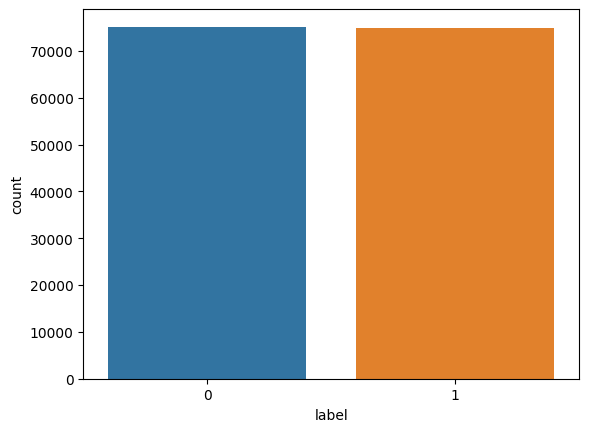

In [54]:
# 레이블별 비율
import seaborn as sns

sns.countplot(x = 'label', data = train_df)

In [55]:
# 결측치 확인
train_df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [56]:
# 결측치(의견없음)가 특정 label 값만 있는지 확인
train_df[train_df['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


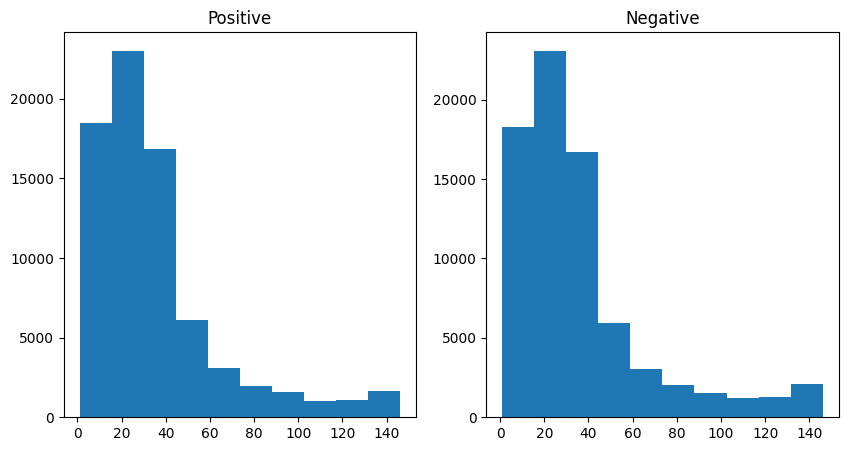

In [57]:
# 레이블별 텍스트 길이
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
data_len = train_df[train_df['label']==1]['document'].str.len()
ax1.hist(data_len)
ax1.set_title('Positive')

data_len = train_df[train_df['label']==0]['document'].str.len()
ax2.hist(data_len)
ax2.set_title('Negative')

plt.show()

📌 형태소 분석기 불러오기

In [58]:
from konlpy.tag import Mecab

In [59]:
mecab = Mecab(dicpath=r'C:/mecab/mecab-ko-dic')

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

📌 데이터 전처리

In [60]:
# 텍스트 전처리(영어와 한글만 남기고 삭제)
train_df['document'] = train_df['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]", "", regex=True)

C:\Users\user\AppData\Local\Temp\ipykernel_15876\1340615090.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['document'] = train_df['document'].str.replace("[^A-Za-z가-힣ㄱ-ㅎㅏ-ㅣ ]", "")


In [61]:
train_df['document'].head()

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

In [62]:
train_df.shape

(150000, 3)

In [63]:
# 결측치 제거
train_df = train_df.dropna()
train_df.shape

(149995, 3)

In [75]:
# 스탑워드와 형태소 분석 (한글 불용어)
def word_tokenization(text):
    stop_word = ''
    with open('../DATA/stopword.txt', 'r',encoding = 'utf-8') as f:
        stop_word += f.read().replace('\n', '\t')
    stop_words = stop_word.split('\t')
    stop_words += ['은', '는', '이', '가' ]
    # print(len(stop_words), stop_words)
    return [word for word in mecab.morphs(text) if word not in stop_word]

In [76]:
data = train_df['document'].apply((lambda x : word_tokenization(x)))

In [77]:
data.head()

0                                     [빙, 짜증, 네요, 목소리]
1                     [흠, 포스터, 보고, 초딩, 영화, 오버, 연기, 가볍]
2                              [너무, 재, 밓었다그래서보는것을추천한다]
3                      [교도소, 이야기, 구먼, 솔직히, 재미, 평점, 조정]
4    [사이몬페그, 익살, 스런, 연기, 돋보였, 던, 영화, 스파이더맨, 늙, 보이, ...
Name: document, dtype: object

In [78]:
# train과 validation 분할
training_size = 120000

# train 분할
train_sentences = data[:training_size]
valid_sentences = data[training_size:]

# label 분할
train_labels = train_df['label'][:training_size]
valid_labels = train_df['label'][training_size:]

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# vocab size 결정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
print('총 단어 개수 :', len(tokenizer.word_index))

# 5회 이상만 vocab_size에 포함
def get_vocab_size(threshold):
    cnt = 0
    for x in tokenizer.word_counts.values():
        if x >= threshold:
            cnt += 1
    return cnt
    
vocab_size = get_vocab_size(5)      # 5회 이상 출현 단어
print('vocab_size : ', vocab_size)

총 단어 개수 : 51422
vocab_size :  14857


In [80]:
oov_tok = "<OOV>"   # 사전에 없는 단어
vocab_size = 15000

tokenizer = Tokenizer(oov_token=oov_tok, num_words=vocab_size)
tokenizer.fit_on_texts(data)

print(tokenizer.word_index)
print("단어 사전 개수:", len(tokenizer.word_counts))

{'<OOV>': 1, '영화': 2, '너무': 3, '봤': 4, '정말': 5, '재밌': 6, '네요': 7, 'ㅋㅋ': 8, '연기': 9, '잘': 10, '최고': 11, '내': 12, '평점': 13, '던': 14, '스토리': 15, 'ㅋㅋㅋ': 16, '드라마': 17, '싶': 18, '감동': 19, '배우': 20, '뭐': 21, '볼': 22, '만들': 23, '내용': 24, '감독': 25, '재미': 26, '그냥': 27, '재미있': 28, '지루': 29, '잼': 30, '재미없': 31, '쓰레기': 32, '사랑': 33, '라고': 34, '나오': 35, '작품': 36, '이거': 37, '끝': 38, '마지막': 39, '건': 40, '액션': 41, '이건': 42, '입니다': 43, '라는': 44, '완전': 45, 'ㅋ': 46, '아깝': 47, '처음': 48, '장면': 49, '모르': 50, '지금': 51, '성': 52, '돈': 53, '최악': 54, 'ㅠㅠ': 55, '이게': 56, '느낌': 57, '이야기': 58, '봐도': 59, '님': 60, '애': 61, '다고': 62, '넘': 63, '인데': 64, '별로': 65, '명작': 66, '난': 67, '이해': 68, '역시': 69, '여자': 70, '한국': 71, '는지': 72, '많이': 73, '주인공': 74, '받': 75, '합니다': 76, '괜찮': 77, '만든': 78, '살': 79, '엔': 80, '기억': 81, 'ㅎㅎ': 82, 'ㅡㅡ': 83, '연출': 84, '재': 85, '이나': 86, '꼭': 87, '현실': 88, '긴': 89, '랑': 90, '내내': 91, '굿': 92, '죽': 93, '결말': 94, '남자': 95, '전개': 96, '세요': 97, '소재': 98, '속': 99, '인생': 100, '아서': 101, '공포': 102

In [81]:
# 문자를 숫자로 표현
print(train_sentences[:2])

0                    [빙, 짜증, 네요, 목소리]
1    [흠, 포스터, 보고, 초딩, 영화, 오버, 연기, 가볍]
Name: document, dtype: object


In [82]:
train_sequences =tokenizer.texts_to_sequences(train_sentences)
valid_sequences = tokenizer.texts_to_sequences(valid_sentences)

In [84]:
print(train_sequences[:2])

[[649, 106, 7, 468], [687, 304, 188, 417, 2, 1218, 9, 675]]


In [85]:
# 문장의 최대 길이
max_length = max(len(x) for x in train_sequences)
print('문장 최대 길이: ', max_length)

문장 최대 길이:  67


In [87]:
# 문장 길이를 동일하게 맞춘다
trunc_type = 'post'     # 뒤에서부터 0 입력
padding_type = 'post'

train_padded = pad_sequences(train_sequences,
                             truncating=trunc_type,
                             padding=padding_type,
                             maxlen=max_length)
valid_padded = pad_sequences(valid_sequences,
                             truncating=trunc_type,
                             padding=padding_type,
                             maxlen=max_length)

In [88]:
import numpy as np

train_labels = np.asarray(train_labels)
valid_labels = np.asarray(valid_labels)

In [89]:
print('샘플: ', train_padded[:1])

샘플:  [[649 106   7 468   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]]


📌 모델

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
# def create_model():
#     model = Sequential([
#         Embedding(vocab_size, 32),
#         Bidirectional(LSTM(16, return_sequences=True)),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
#     return model

In [127]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [136]:
# model = create_model()

In [137]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [138]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          480000    
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 32)         6272      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, None, 32)          1056      
                                                                 
 dense_7 (Dense)             (None, None, 1)           33        
                                                                 
Total params: 487,361
Trainable params: 487,361
Non-trainable params: 0
_________________________________________________________________


In [139]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [140]:
# 가장 좋은 loss의 가중치 저장
checkpoint_path = 'best_performed_model.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path,
                             save_weights_only = True,
                             save_best_only = True,
                             monitor = 'val_loss',
                             verbose = 1)

In [141]:
# 학습 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [142]:
train_padded.shape, train_labels.shape

((120000, 67), (120000, 1))

In [143]:
valid_padded.shape, valid_labels.shape

((29995, 67), (29995, 1))

In [144]:
# 학습
history = model.fit(train_padded, train_labels,
                    validation_data = (valid_padded, valid_labels),
                    callbacks = [early_stop],
                    batch_size = 64, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 69s 33ms/step - loss: 0.4341 - acc: 0.7949 - val_loss: 0.3869 - val_acc: 0.8245
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.3549 - acc: 0.8424 - val_loss: 0.3984 - val_acc: 0.8214
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3265 - acc: 0.8552 - val_loss: 0.3955 - val_acc: 0.8188


In [147]:
history.history['val_loss']

[0.3869340717792511, 0.39842748641967773, 0.3954681158065796]

📌 평가

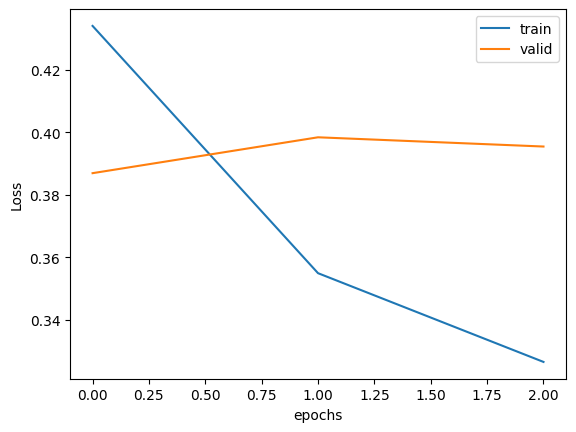

In [158]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.show()

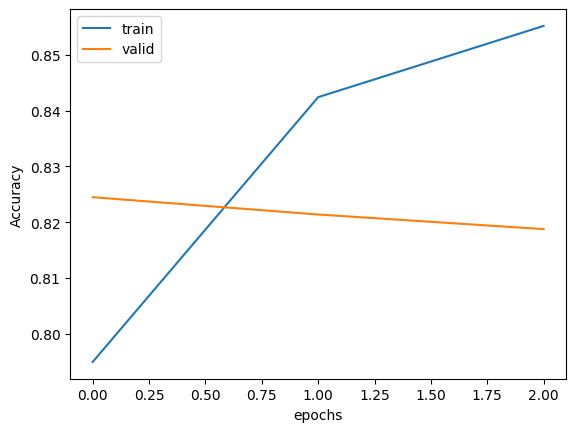

In [159]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
plt.show()